# Exploratory Data Analysis

### Imports

In [7]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

C = 'consensus_time'
F = 'opinion_change_frequency'

In [26]:
dataset = pd.read_csv('../data/dataset.csv')

In [16]:
dataset.pivot(columns='type')[['opinion_change_frequency']].describe()

opinion_change_frequency                                              \
type           barabasi_linear barabasi_nonlinear_05 barabasi_nonlinear_15   
count               300.000000            300.000000            300.000000   
mean                283.568800            286.236267            280.953333   
std                  85.919363             83.222891             94.205873   
min                 200.000000            200.000000            200.000000   
25%                 200.000000            201.935000            200.000000   
50%                 251.595000            259.765000            231.395000   
75%                 379.360000            383.755000            388.490000   
max                 478.960000            448.760000            504.440000   

                                              
type  erdos_renyi watts-strogatz      waxman  
count  288.000000     300.000000  186.000000  
mean   274.624792    5639.208333  295.961774  
std     34.502494    2629.696544   49.721673  
min    228.060000    1385.550000  236.120000  
25%    239.645000    2369.720000  257.750000  
50%    269.410000    6505.820000  270.980000  
75%    308.515000    7805.122500  350.250000  
max    359.880000   10212.310000  402.080000

### Creating Scaler

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# dataset[FEATURES] = scaler.fit_transform(dataset[FEATURES])
# dataset[['consensus_time', 'opinion_change_frequency']] = scaler.fit_transform(dataset[['consensus_time', 'opinion_change_frequency']])

## Correlation Heatmap

In [18]:
from sklearn.metrics.pairwise import pairwise_distances
feature_correlation = pairwise_distances(measures_df[FEATURES].T, metric='correlation')
feature_correlation = pd.DataFrame(feature_correlation, index=FEATURES)

In [19]:
filtered_dataset = dataset[(dataset['initialization'] == 'direct')]
filtered_dataset.describe()

,index,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance,consensus_time,opinion_change_frequency,groups
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.00000,558.000000
mean,836.500000,0.134973,0.302541,1522.851944,4.044704,0.230008,-0.018908,0.003183,0.007993,2.980314,40.393910,8151.512204,1508.18724,2.326165
std,483.674994,0.238953,0.101750,1151.472082,2.302944,0.173878,0.163531,0.000841,0.006720,1.210182,59.354528,16499.204832,2812.11660,1.638100
min,1.000000,0.008343,0.096122,548.311000,2.095622,0.048632,-0.394020,0.001307,0.003230,0.377454,3.452053,14.380000,200.00000,0.000000
25%,418.750000,0.023500,0.295687,1002.345000,3.003690,0.077912,-0.028069,0.002955,0.004963,2.621872,6.344289,489.670000,200.00000,1.000000
50%,836.500000,0.026425,0.313753,1101.902500,3.202805,0.101251,-0.005222,0.003437,0.005224,3.645626,14.142136,623.300000,202.20000,2.000000
75%,1254.250000,0.032066,0.334649,1198.682000,3.396364,0.400087,0.117568,0.003652,0.005649,3.831956,32.907699,1357.125000,250.97500,4.000000
max,1672.000000,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004290,0.027219,4.027738,204.959142,72565.190000,9926.66000,5.000000


<Axes: >

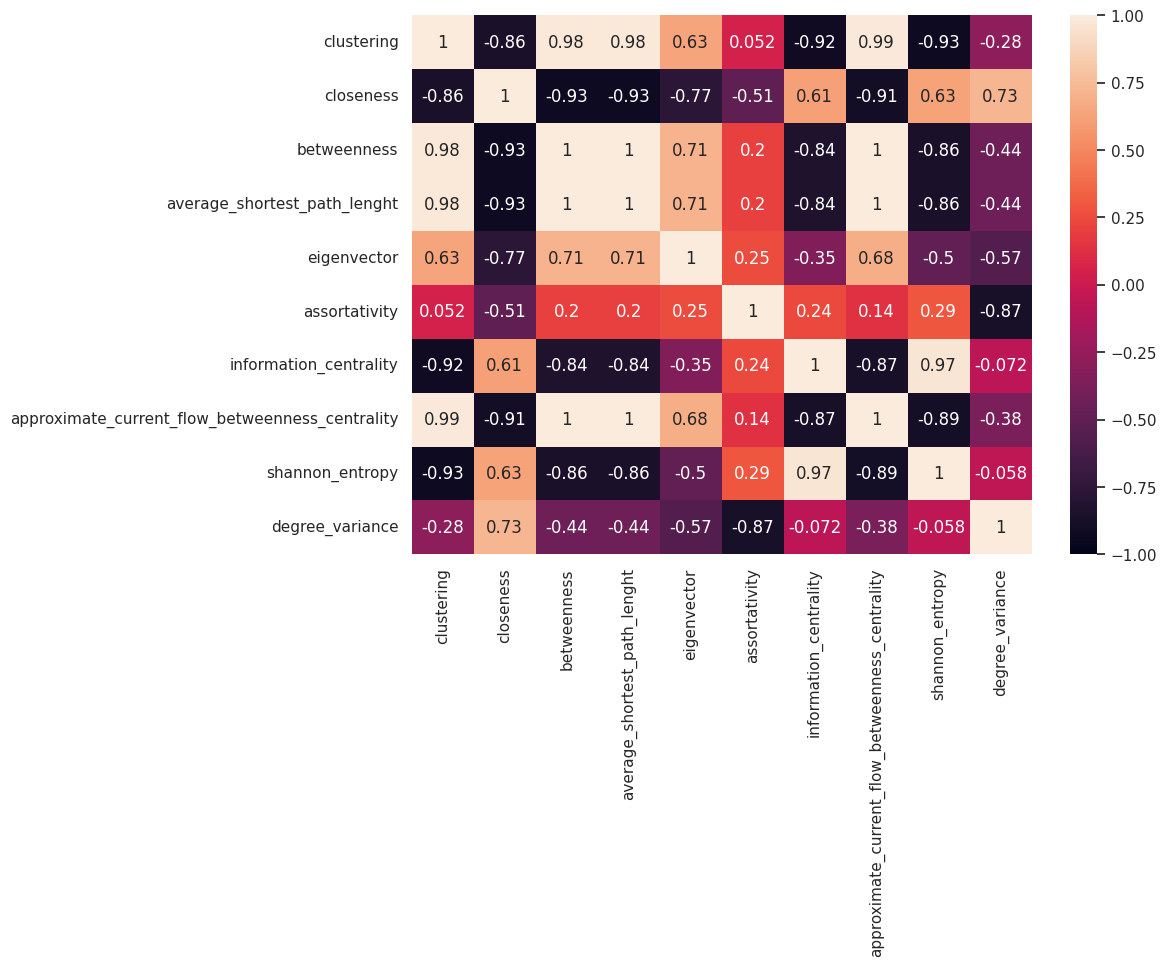

In [20]:
sns.set_theme(rc={'figure.figsize':(10,7)})
sns.heatmap(filtered_dataset[FEATURES].corr(method='pearson'), annot=True, vmax=1, vmin=-1)

In [15]:
np.sum(np.abs(filtered_dataset[FEATURES].corr(method='pearson')))/len(FEATURES)

/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


clustering                                         0.763339
closeness                                          0.787720
betweenness                                        0.795700
average_shortest_path_lenght                       0.795700
eigenvector                                        0.617877
assortativity                                      0.375293
information_centrality                             0.672003
approximate_current_flow_betweenness_centrality    0.785057
shannon_entropy                                    0.700228
degree_variance                                    0.482359
dtype: float64

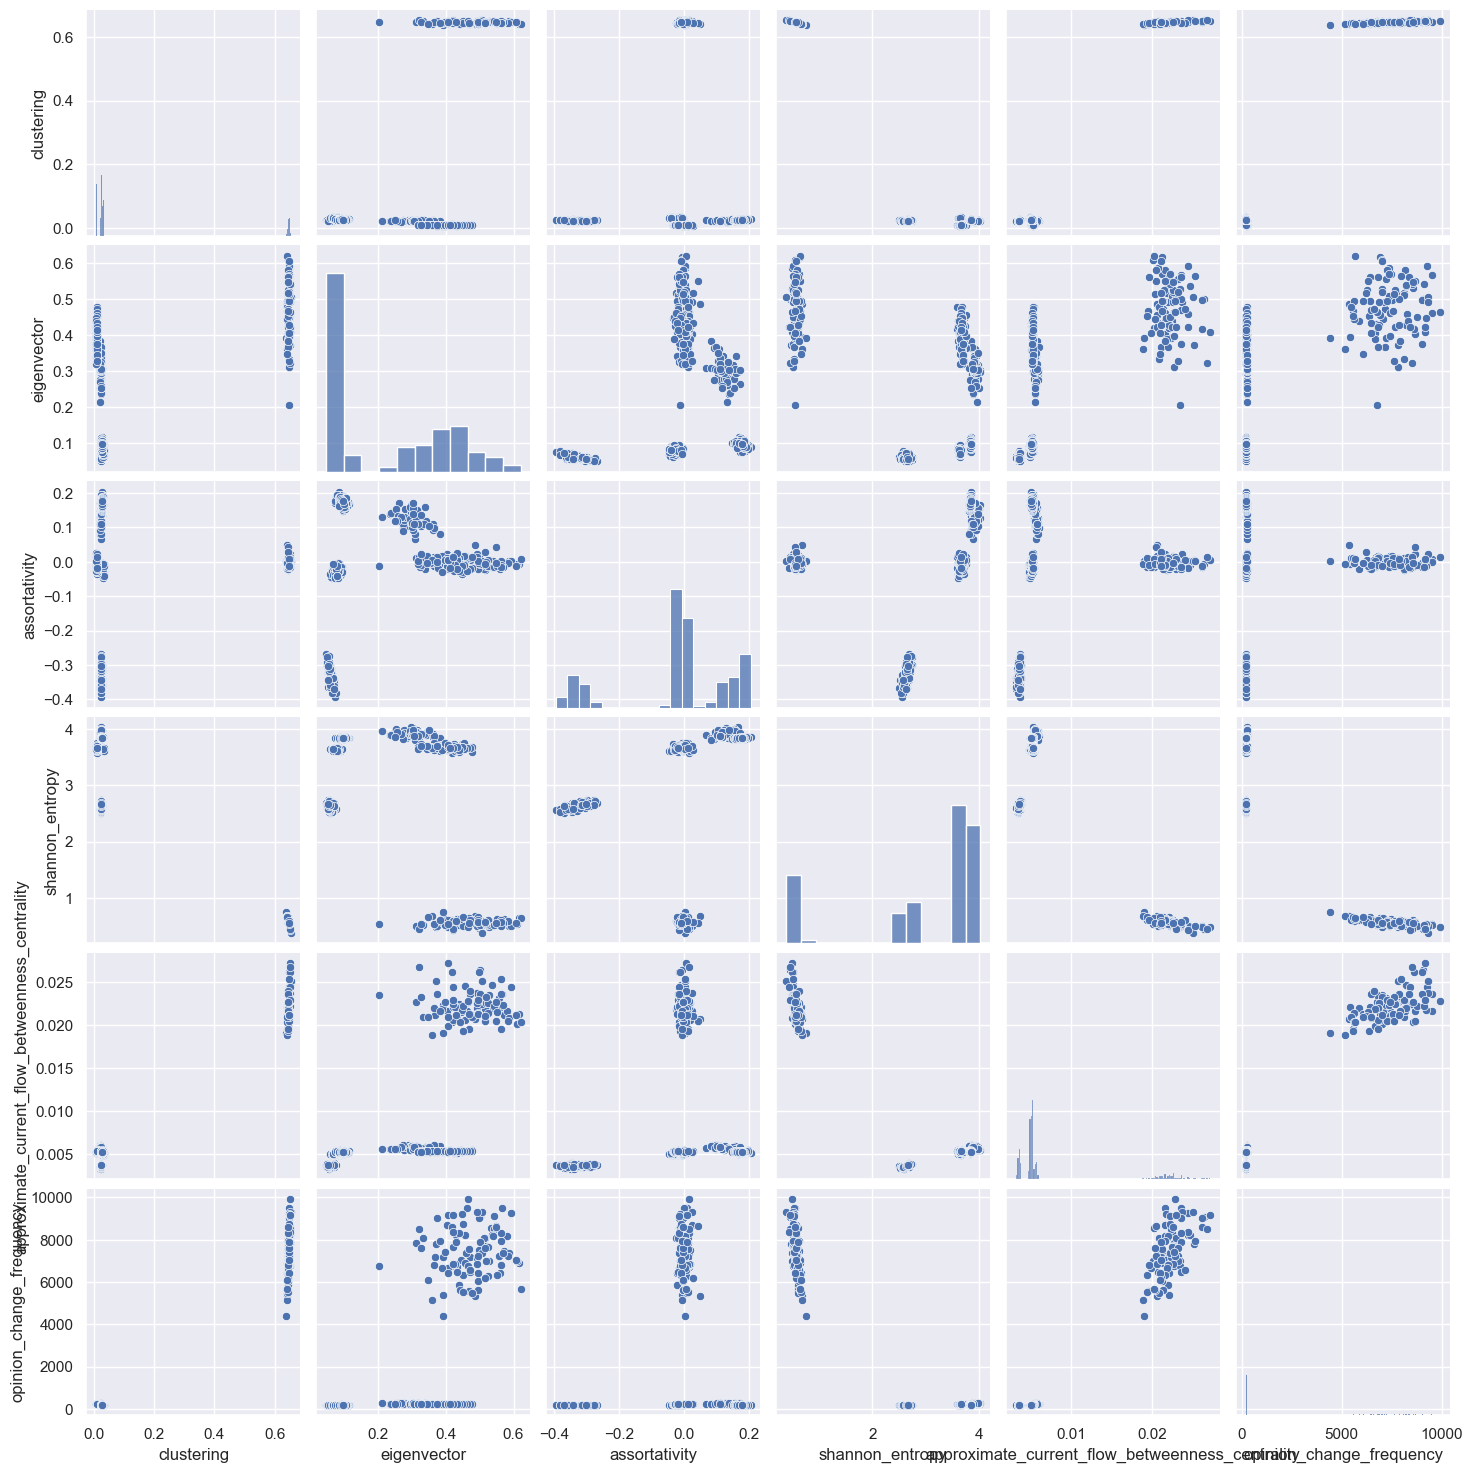

In [100]:
sns.pairplot(filtered_dataset[['clustering', 'eigenvector', 'assortativity', 'shannon_entropy', 'approximate_current_flow_betweenness_centrality', 'opinion_change_frequency']])

In [16]:
from sklearn.model_selection import train_test_split

# filtered_dataset.loc[:, FEATURES] = scaler.fit_transform(filtered_dataset[FEATURES])
# filtered_dataset.loc[:, 'opinion_change_frequency'] = scaler.fit_transform(np.array(filtered_dataset['opinion_change_frequency']).reshape(-1, 1))

SELECTED_FEATURES = ['clustering', 'approximate_current_flow_betweenness_centrality', 'shannon_entropy']


y = filtered_dataset['opinion_change_frequency']
X = sm.add_constant(
   filtered_dataset[FEATURES]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, shuffle=True
)

X_train[FEATURES] = scaler.fit_transform(X_train[FEATURES])
X_test[FEATURES] = scaler.transform(X_test[FEATURES])


In [17]:
mod = sm.GLM(
    endog=y_train, 
    exog=X_train,
    family=sm.families.Poisson()
)
res = mod.fit()

In [18]:
print(res.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     opinion_change_frequency   No. Observations:                  446
Model:                                  GLM   Df Residuals:                      436
Model Family:                       Poisson   Df Model:                            9
Link Function:                          Log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -4843.7
Date:                      Wed, 21 Aug 2024   Deviance:                       6180.0
Time:                              20:28:26   Pearson chi2:                 6.21e+03
No. Iterations:                           6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [19]:
y_test_pred = res.predict(X_test)

<Axes: ylabel='Count'>

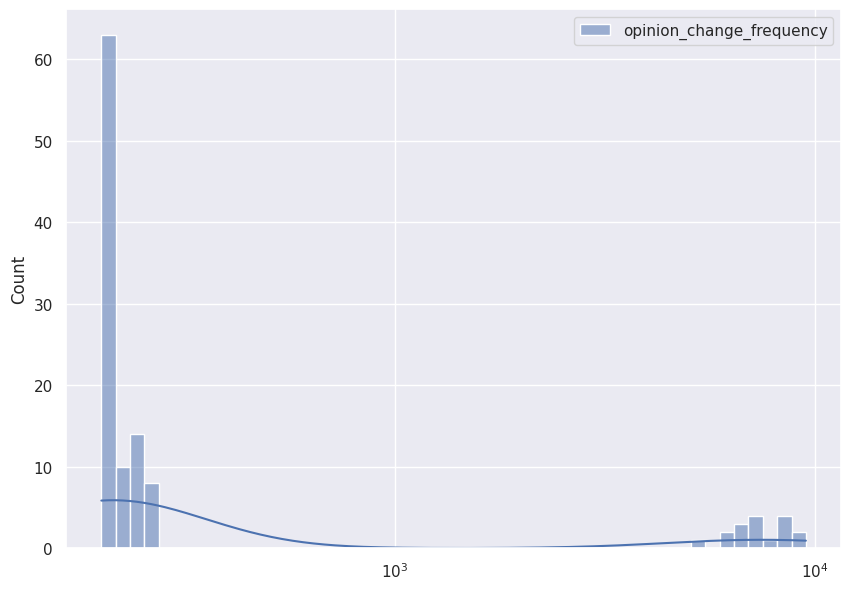

In [37]:
sns.histplot([y_test_pred, y_test], kde=True, log_scale=(True, False), )

0.9883305805005373

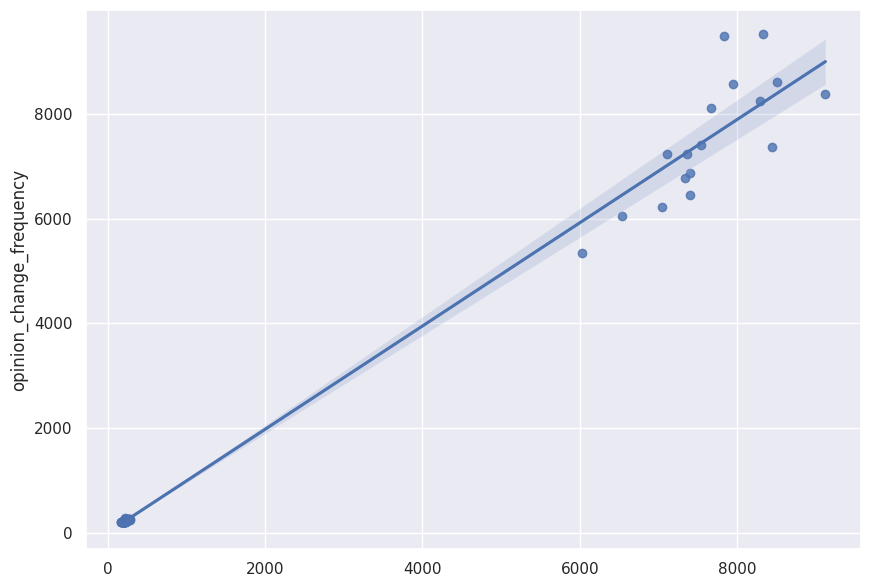

In [20]:
sns.regplot(x=y_test_pred, y=y_test, data=None)

from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

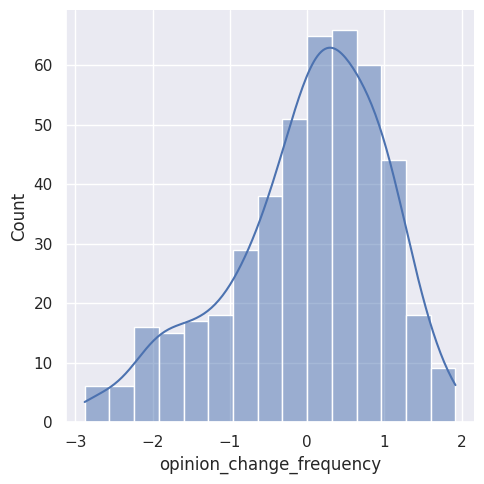

In [136]:
sns.displot(data=filtered_dataset, x='opinion_change_frequency', kde=True, log_scale=(False, False))

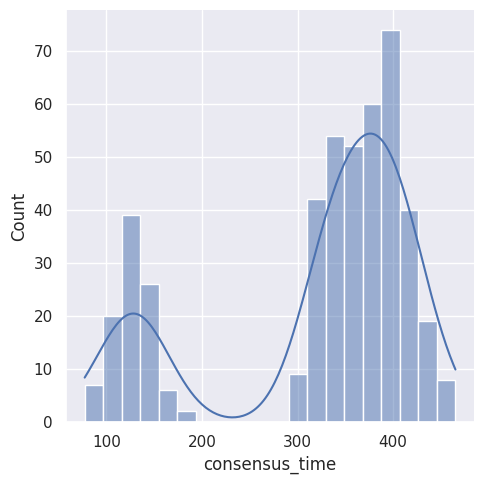

In [47]:
sns.displot(filtered_dataset['consensus_time'], kde=True, log_scale=(False, False))

## Networks Boxplots for each Measure

In [14]:
sns.set_theme(rc={'figure.figsize':(15,6)})

### Clustering
It is possible to see how Watts Strogatz networks presents elevated Clustering Coefficient

<Axes: xlabel='clustering'>

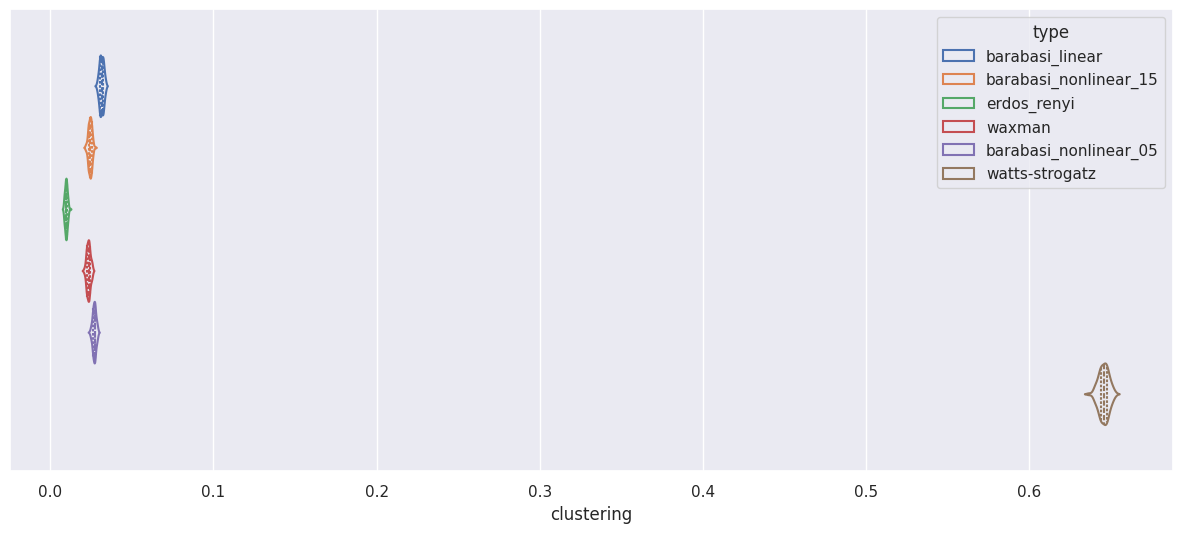

In [14]:
sns.violinplot(
    data=measures_df, 
    x="clustering", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Assortativity
The plot shows Barabasi Non-Linear with $p=1.5$ having negative assortativity, indicating the tendency of nodes to attach to different ones. There is a neutral pattern in Watts-Strogatz, Barabasi-Linear and Erdos Renyi graphs. At last, we see homophily happening with Waxman and Barabasi Non-Linear with $p=0.5$

<Axes: xlabel='assortativity'>

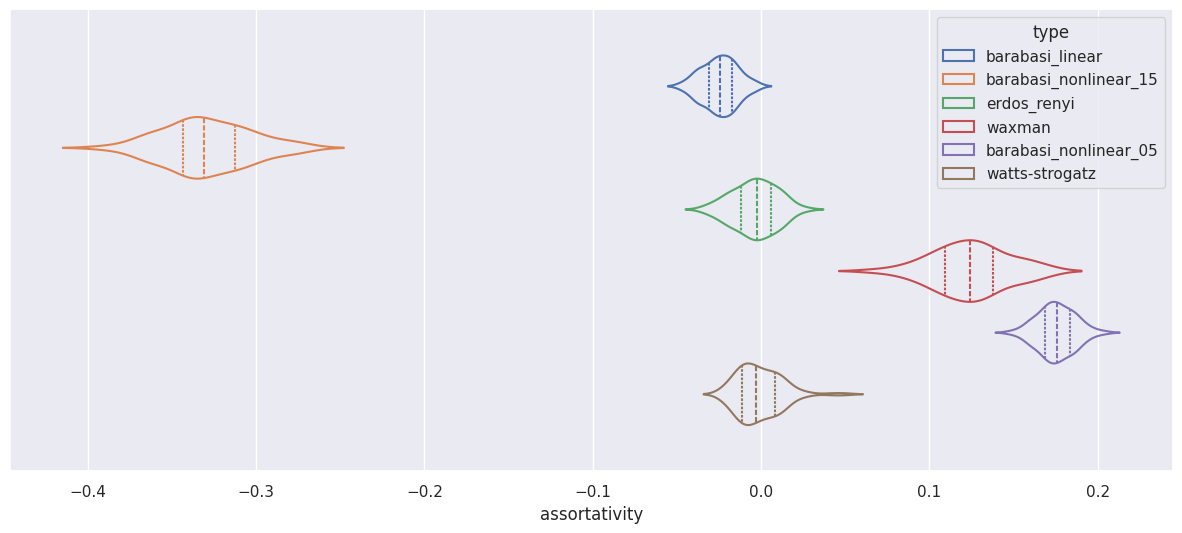

In [15]:
sns.violinplot(
    data=measures_df, 
    x="assortativity", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Closeness
At the extremes of the plot, we can see Watts-Strogatz networks having a smaller amount of central nodes and Barabasi Non-Linear with $p=1.5$ with high amount of central nodes

<Axes: xlabel='closeness'>

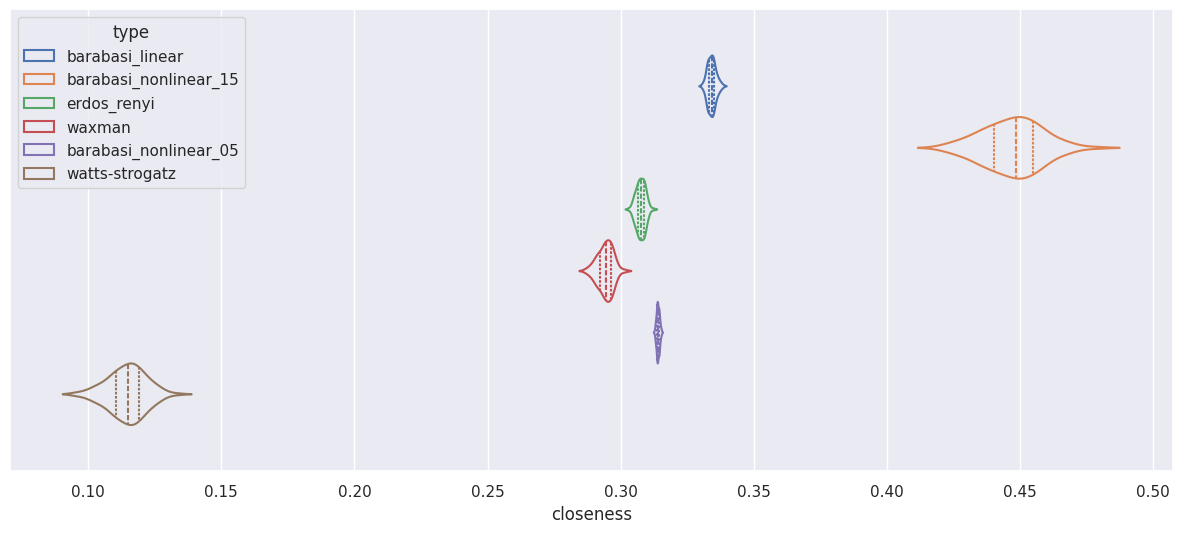

In [16]:
sns.violinplot(
    data=measures_df, 
    x="closeness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Betweenness

This graph shows clearly the disparity of Watts-Strogatz networks to have higher nodes that are present in Shortest Path Lenghts

<Axes: xlabel='betweenness'>

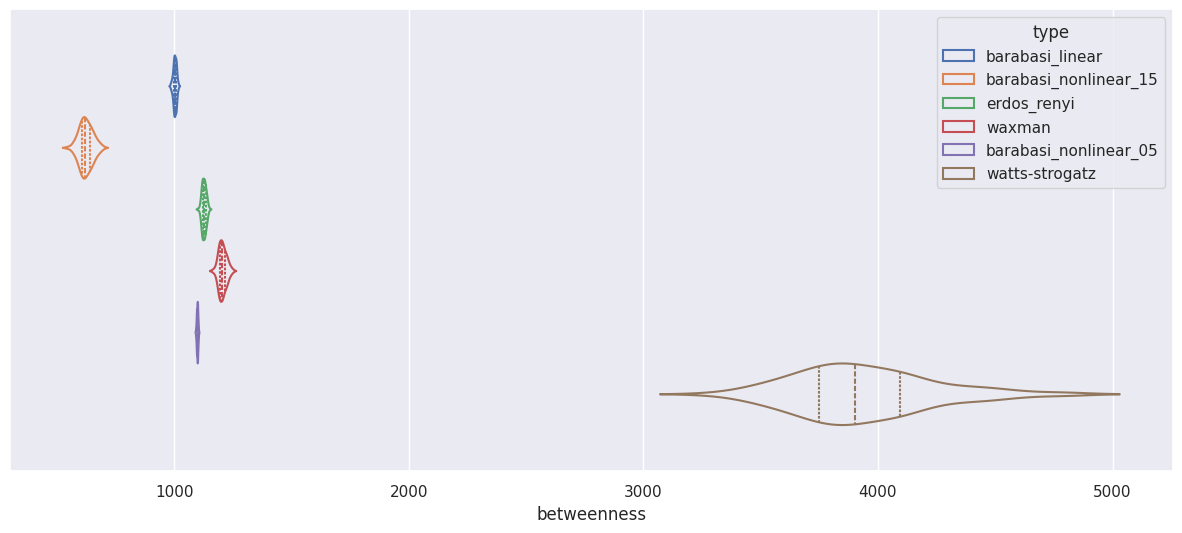

In [17]:
sns.violinplot(
    data=measures_df, 
    x="betweenness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Average Shortest Path Lenght
Watts-Strogatz is also the networks with higher Average Shortest Path Lenght

<Axes: xlabel='average_shortest_path_lenght'>

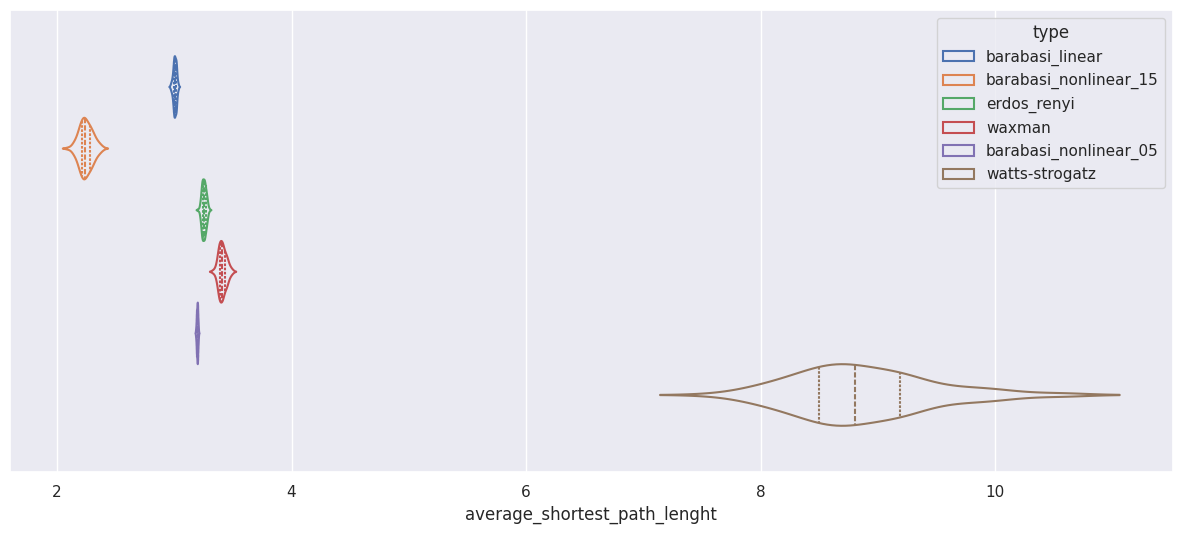

In [18]:
sns.violinplot(
    data=measures_df, 
    x="average_shortest_path_lenght", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Shannon Entropy

<Axes: xlabel='shannon_entropy'>

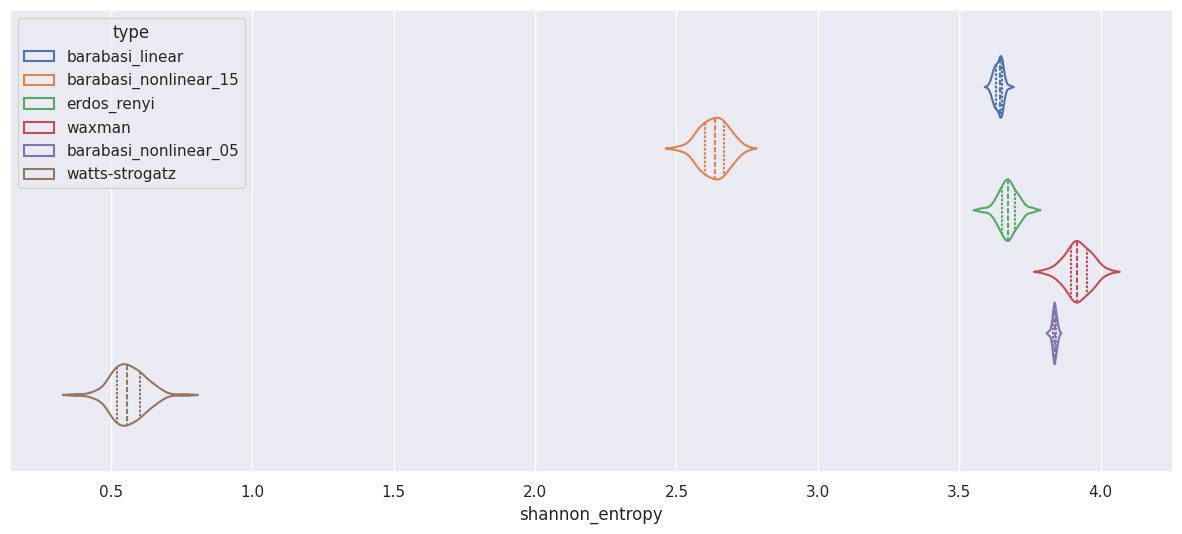

In [19]:
sns.violinplot(
    data=measures_df, 
    x="shannon_entropy", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Degree Variance

<Axes: xlabel='degree_variance'>

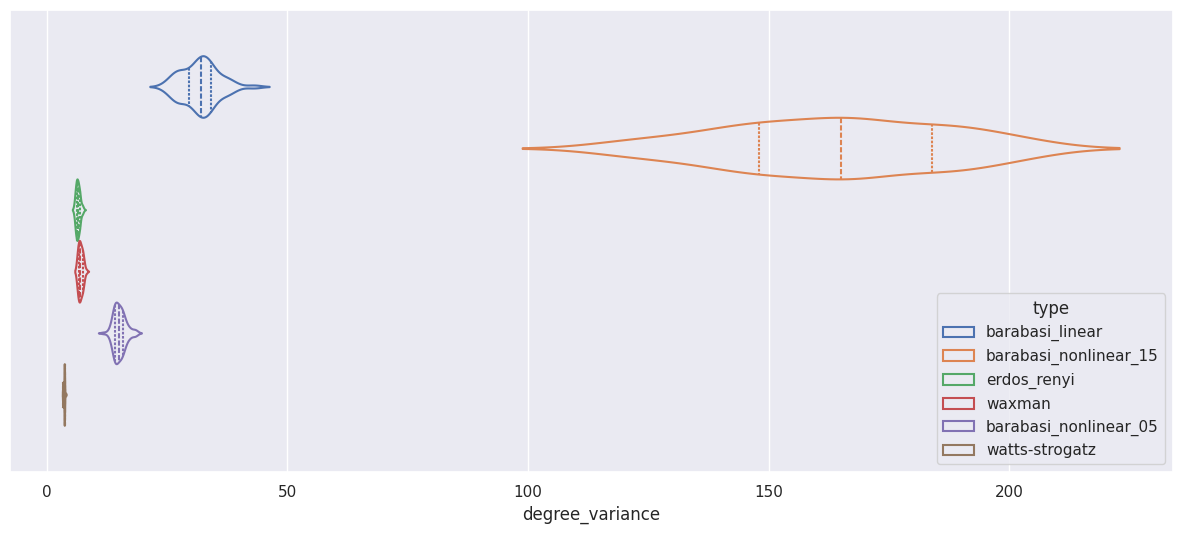

In [20]:
sns.violinplot(
    data=measures_df, 
    x="degree_variance", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Eigenvector

<Axes: xlabel='eigenvector'>

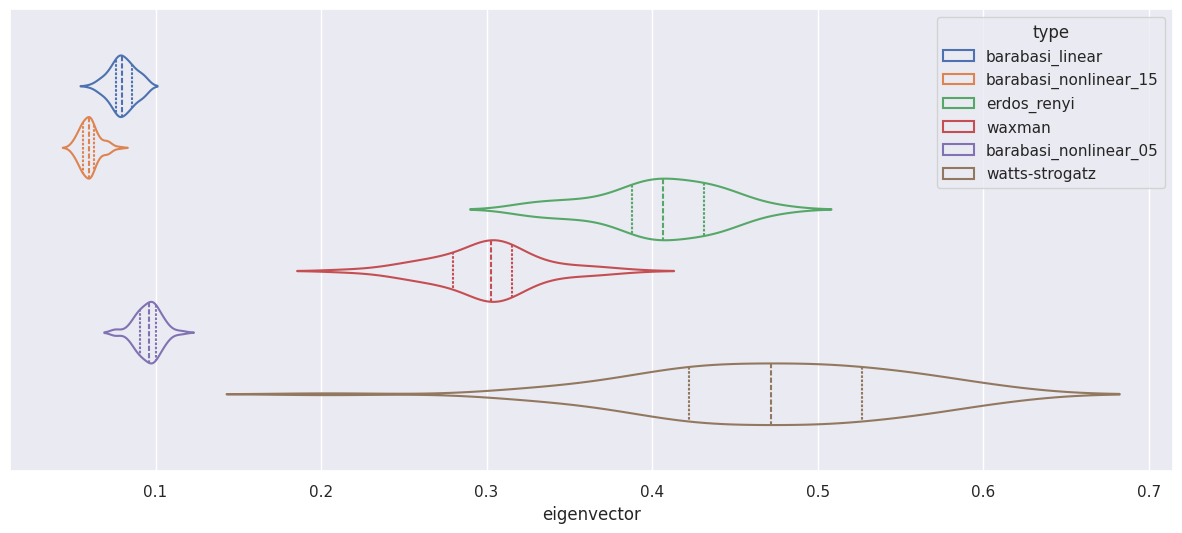

In [21]:
sns.violinplot(
    data=measures_df, 
    x="eigenvector", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Information Centrality
Centralidade de Informacao

<Axes: xlabel='information_centrality'>

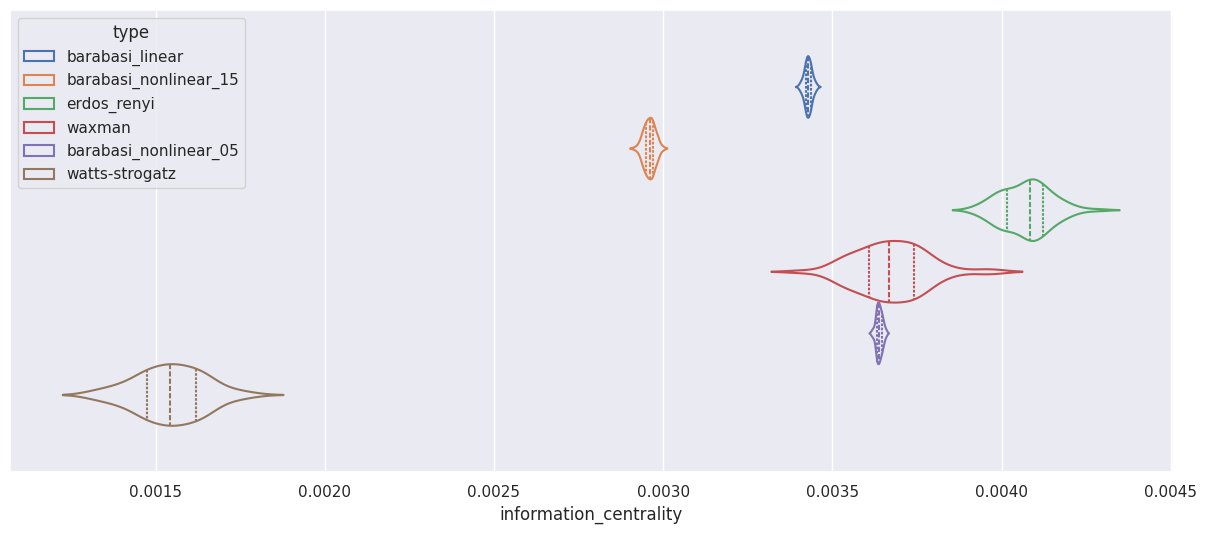

In [22]:
sns.violinplot(
    data=measures_df, 
    x="information_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Approximate Current Flow Betweenness Centrality

<Axes: xlabel='approximate_current_flow_betweenness_centrality'>

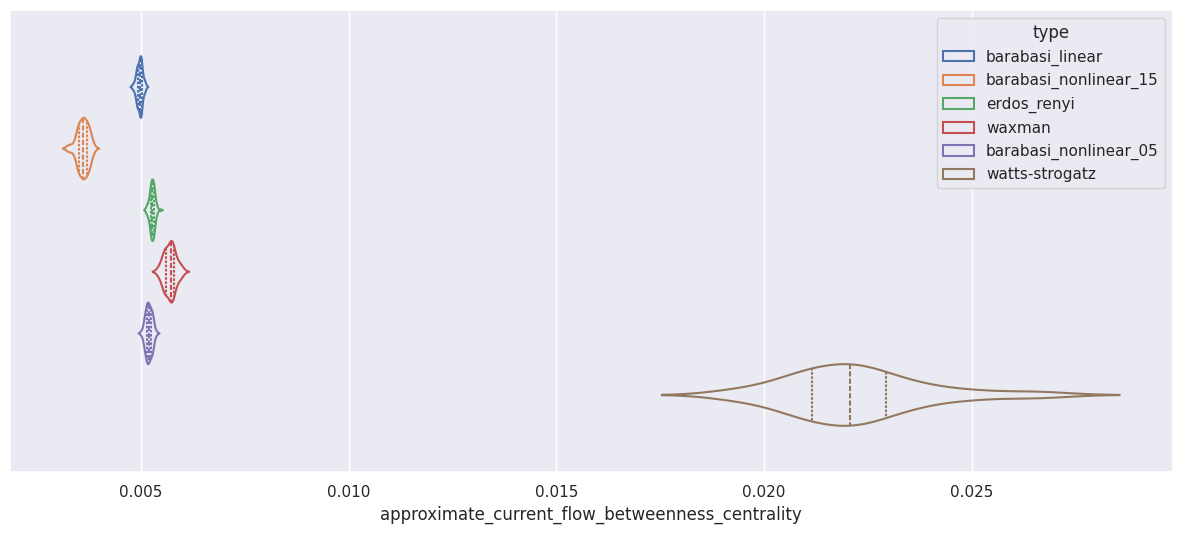

In [23]:
sns.violinplot(
    data=measures_df, 
    x="approximate_current_flow_betweenness_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

## Network Metrics for each Initialization

In [24]:
sns.set_theme()

In [25]:
np.unique(dataset['type'])

array(['barabasi_linear', 'barabasi_nonlinear_05',
       'barabasi_nonlinear_15', 'erdos_renyi', 'watts-strogatz', 'waxman'],
      dtype=object)

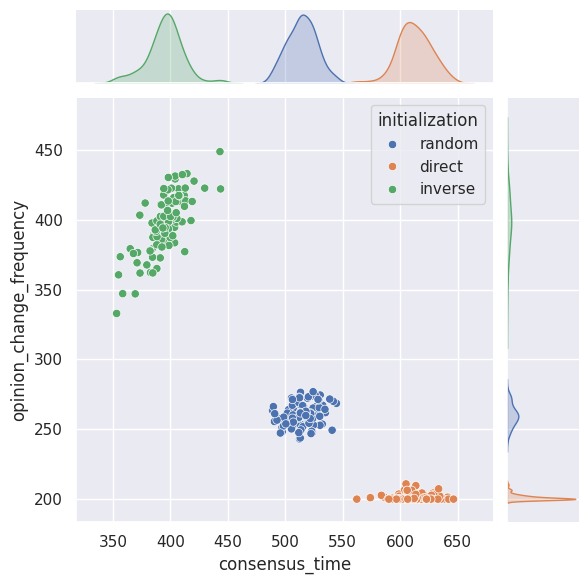

In [26]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_05'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
    # kind="kde",
)

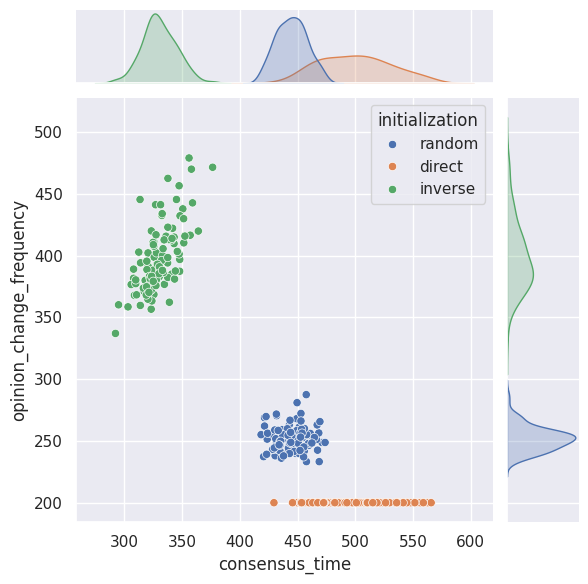

In [27]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_linear'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

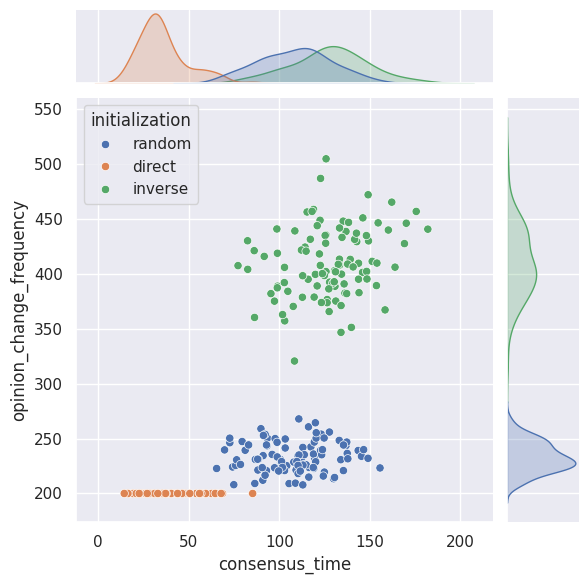

In [28]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_15'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

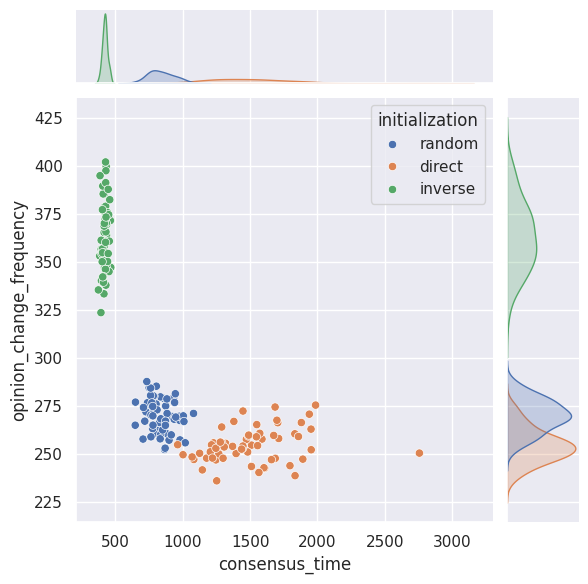

In [29]:
sns.jointplot(
    data=dataset[dataset['type'] == 'waxman'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

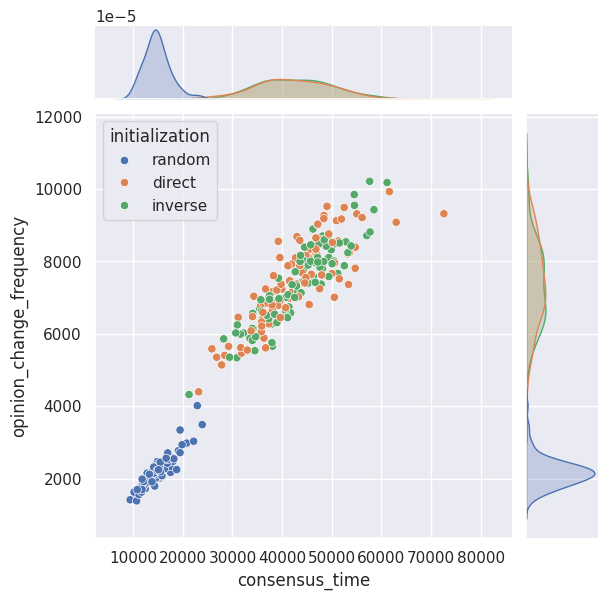

In [30]:
sns.jointplot(
    data=dataset[dataset['type'] == 'watts-strogatz'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

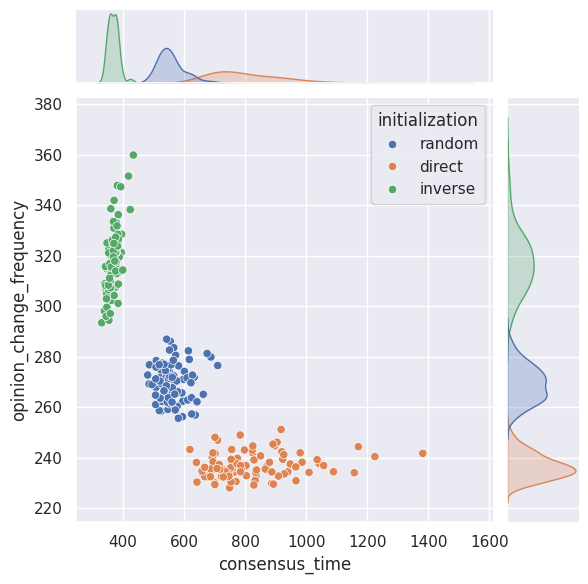

In [31]:
sns.jointplot(
    data=dataset[dataset['type'] == 'erdos_renyi'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)